## 8.3. Odev_Proje 3 verisi

Koronavirus verisi analizi: https://github.com/Atharva-Peshkar/Covid-19-Patient-Health-Analytics

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [2]:
covid = pd.read_csv('covid.csv')
covid.tail()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
1080,1081,Innsbruck,Austria,NaN,24.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,Algeria,Algeria,male,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,Croatia,Croatia,male,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,Bern,Switzerland,male,70.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covid = covid.drop(['symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','sym_on','hosp_vis',
                   'id','location','recov'], axis=1)

In [4]:
covid = pd.get_dummies(data=covid, columns=['country', 'gender'])

In [5]:
covid = covid.dropna()

In [6]:
print(covid.shape)

(839, 44)


In [9]:
X = covid[['age','from_wuhan','country_China','gender_male']]
Y = covid.death
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.2,random_state=40)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(X_egitim,Y_egitim)

RandomForestClassifier(n_estimators=25, random_state=2)

In [11]:
from sklearn.metrics import accuracy_score

Y_tahmin_RO = rastgele_orman.predict(X_test)
print("Rastgele orman dogrulu orani: {:.2f}".format(accuracy_score(Y_test,Y_tahmin_RO)))

Rastgele orman dogrulu orani: 0.95


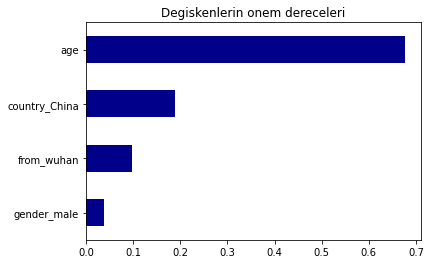

In [12]:
onem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_, index=X_egitim.columns)

onem_dereceleri_sirali = onem_dereceleri.sort_values()

onem_dereceleri_sirali.plot(kind='barh', color='darkblue')
plt.title('Degiskenlerin onem dereceleri')
plt.show()

# modelimiz icin en onemli degisken yas olarak belirlendi